# MAE 598: Design Optimization - Homework 3

## Problem 1

The objective function


$$ {\min_{A_{12}, A_{21}} \quad (p(x_i, A) - p_m)^2 } $$

where,

$ p(x_i, A) $ is the output from the prediction model

$ p_m $ is the measured value


In [19]:
# Import libraries
import torch as t
import numpy as np
import torch.nn as nn
from matplotlib import pyplot as plt

In [20]:
# Initialize all given data

T = 20.0 # Temperature in °C

# x1 and x2 values
x1 = t.linspace(0., 1.0, 11, dtype=t.float32)
x2 = 1 - x1

# Measured pressure values
pm = t.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5], dtype=t.float32)

# Constants a1, a2 and a3
a = t.tensor([[8.07131, 1730.63, 233.426], 
              [7.43155, 1554.679, 240.337]], dtype=t.float32)

In [21]:
# Calculate the saturation pressure
pSat =  lambda a: 10.0 ** (a[0] - (a[1] / (T + a[2])))

pSat1 = pSat(a[0,:]) # Water
pSat2 = pSat(a[1,:]) # 1,4 dioxane
print(f'Saturation pressures \nWater: {pSat1} \n1,4 dioxane: {pSat2} \n')

Saturation pressures 
Water: 17.473241806030273 
1,4 dioxane: 28.82411003112793 



In [22]:
# Define the pressure equilibrium relation
def forward():
    p = lambda A: (x1 * pSat1 * t.exp(A[0] * ((A[1] * x2) / (A[0] * x1 + A[1] * x2)) ** 2)) + (x2 * pSat2 * t.exp(A[1] * ((A[0] * x1) / (A[0] * x1 + A[1] * x2)) ** 2))
    return p(A)

In [23]:
# Define initial parameters
learnig_rate = 0.001
max_iters = 100
A = t.tensor([1., 1.], requires_grad=True) # Optimization variable

# Define MSE loss function
loss = nn.MSELoss(reduction='mean')
# Select Stochastic Gradient Descent as the optimization method
optimizer = t.optim.SGD([A], lr=learnig_rate)

# Train the model
for epochs in range(max_iters):
    p_pred = forward() # Forward pass to calculate the predicted pressure value
    cost = loss(pm, p_pred) # Compute the loss
    
    # Output the training parameters
    if epochs % 5 == 4:
        print(f'epoch; {epochs} \t Loss: {cost} \t A: {A}')

    cost.backward() # Compute the gradient
    optimizer.step() # Compute the next step, update A
    optimizer.zero_grad() # Clear out the current gradient

epoch; 4 	 Loss: 26.069440841674805 	 A: tensor([1.1489, 1.1263], requires_grad=True)
epoch; 9 	 Loss: 16.818958282470703 	 A: tensor([1.3114, 1.2693], requires_grad=True)
epoch; 14 	 Loss: 10.23377799987793 	 A: tensor([1.4476, 1.3915], requires_grad=True)
epoch; 19 	 Loss: 5.900332450866699 	 A: tensor([1.5579, 1.4910], requires_grad=True)
epoch; 24 	 Loss: 3.2571768760681152 	 A: tensor([1.6444, 1.5685], requires_grad=True)
epoch; 29 	 Loss: 1.7509592771530151 	 A: tensor([1.7103, 1.6264], requires_grad=True)
epoch; 34 	 Loss: 0.9397298693656921 	 A: tensor([1.7595, 1.6680], requires_grad=True)
epoch; 39 	 Loss: 0.5212108492851257 	 A: tensor([1.7957, 1.6969], requires_grad=True)
epoch; 44 	 Loss: 0.31139126420021057 	 A: tensor([1.8222, 1.7162], requires_grad=True)
epoch; 49 	 Loss: 0.20754508674144745 	 A: tensor([1.8416, 1.7287], requires_grad=True)
epoch; 54 	 Loss: 0.15582802891731262 	 A: tensor([1.8560, 1.7362], requires_grad=True)
epoch; 59 	 Loss: 0.1292543262243271 	 A: te

In [24]:
# Output results
print("Predicted pressure values:\n", p_pred.detach().numpy())
print(f"\nOptimized values of A \nA12: {A[0].item()} \t A21: {A[1].item()}")

Predicted pressure values:
 [28.82411  34.41483  36.28128  36.746063 36.76391  36.64446  36.32486
 35.422653 33.141857 28.024223 17.473242]

Optimized values of A 
A12: 1.9058706760406494 	 A21: 1.7332605123519897


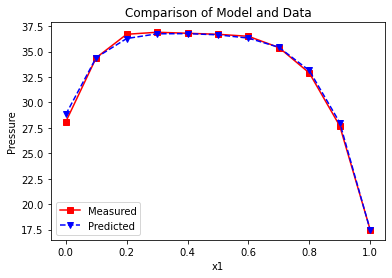

In [25]:
# Plot results
plt.plot(x1, pm, 'rs-', label="Measured")
plt.plot(x1, p_pred.detach().numpy(), 'bv--', label="Predicted")
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.title('Comparison of Model and Data')
plt.legend()
plt.show()